In [3]:
import pandas as pd
from tabula import read_pdf
from tabulate import tabulate

In [ ]:
#Setting valid pages
p=''
for i in range(1,419):
    if i%3!=0:
        if i==1:
            p=p+str(i)
        else:
            p=p+','+str(i)
p=p+',420,421,423,424,426,427,428,429,430,431,433,434,436,437,439,440,442,443,445,446,448,449,451,452'
for i in range(454,825):
    p=p+','+str(i)

In [ ]:
url_año='https://www.sedeco.cdmx.gob.mx/storage/app/media/Canasta%20Basica/2022/preciosdelacanastabasica2022.pdf''

df=read_pdf(url_año, pages=p, output_format='dataframe', lattice = True)
df=df[0]

In [ ]:
#Rename and drop columns
df=df.drop([0])
df=df.rename(columns={'Canales de Abasto':'Descripcion', 
                      'Tienda de\rAutoservicio':'AutoservicioBajo',
                      'Mercado Sobre\rRuedas': 'AutoservicioAlto',
                      'Mercados Públicos':'RuedasBajo',
                      'ceda':'RuedasAlto',
                      'Unidad\rde\rMedida':'PublicoBajo',
                      'Unnamed: 6':'PublicoAlto',
                      'Unnamed: 7':'CedaBajo',
                      'Unnamed: 8':'CedaAlto'})
df=df.drop(columns=['Unnamed: 9'])
df

In [ ]:
#Cleaning data
df['AutoservicioBajo']=df.AutoservicioBajo.str.extract('(\d*\.\d*)')
df['AutoservicioAlto']=df.AutoservicioAlto.str.extract('(\d*\.\d*)')
df['RuedasBajo']=df.RuedasBajo.str.extract('(\d*\.\d*)')
df['RuedasAlto']=df.RuedasAlto.str.extract('(\d*\.\d*)')
df['PublicoBajo']=df.PublicoBajo.str.extract('(\d*\.\d*)')
df['PublicoAlto']=df.PublicoAlto.str.extract('(\d*\.\d*)')
df['CedaBajo']=df.CedaBajo.str.extract('(\d*\.\d*)')
df['CedaAlto']=df.CedaAlto.str.extract('(\d*\.\d*)') # Extraccion de numeros unicamente
df['Descripcion']=df.Descripcion.str.replace('\r',' ') # Limpieza de caracteres en descripcion
df=df.dropna()

In [ ]:
df=df.reset_index()

df.drop(['index'],axis=1,inplace=True)

In [ ]:
df.to_csv('data2022.csv') #Data partially cleaned

# Lectura de CSV

In [40]:
ds=pd.read_csv('data2022.csv')
ds.drop(['Unnamed: 0'],axis=1,inplace=True)

In [41]:
ds['max_price']=ds.max(axis=1)   #Estandarizar campo max_price

/tmp/ipykernel_1624/4200937764.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ds['max_price']=ds.max(axis=1)   #Estandarizar campo max_price


In [42]:
ds.drop(['AutoservicioBajo','AutoservicioAlto', 'RuedasBajo', 'RuedasAlto', 'PublicoBajo', 'PublicoAlto', 'CedaBajo', 'CedaAlto'], axis=1, inplace=True)

In [43]:
ds

,Descripcion,max_price
0,Aceite Mixto,42.0
1,Arroz largo,35.0
2,Azúcar Estándar,30.0
3,Harina de Trigo,20.0
4,Frijol Flor de Mayo,60.0
...,...,...
10034,Lechuga romana,24.9
10035,Papa alpha,39.9
10036,Pepino,29.9
10037,Tomate verde,39.9


In [44]:
ds['Descripcion'].value_counts()

Zanahoria mediana             336
Arroz largo                   335
Tomate verde                  335
Pepino                        335
Papa alpha                    335
Jitomate Saladette            335
Chayote sin espina            335
Cebolla bola                  335
Chile serrano                 335
Chile poblano                 335
Calabacita Italiana           335
Sandía                        335
Plátano                       335
Papaya maradol                335
Manzana Starking              335
Manzana Golden                335
Guayaba                       335
Aguacate Hass                 335
Bistec Diezmillo de Res       335
Carne Molida Sirloin 90-10    335
Huevo Blanco                  335
Frijol Negro                  335
Frijol Flor de Mayo           335
Harina de Trigo               335
Azúcar Estándar               335
Naranja mediana               334
Piña                          334
Limón con semilla             334
Lechuga romana                334
Aceite Mixto  

In [45]:
prices=dict()
for i in ds['Descripcion'].value_counts().index:
    prices[i]=list(ds[ds['Descripcion']==i].max_price.values) #Diccionario de Items

In [46]:
prices=pd.DataFrame({ key:pd.Series(value) for key, value in prices.items() }) #Convirtiendo a dataframe

In [47]:
prices

,Zanahoria mediana,Arroz largo,Tomate verde,Pepino,Papa alpha,Jitomate Saladette,Chayote sin espina,Cebolla bola,Chile serrano,Chile poblano,...,Huevo Blanco,Frijol Negro,Frijol Flor de Mayo,Harina de Trigo,Azúcar Estándar,Naranja mediana,Piña,Limón con semilla,Lechuga romana,Aceite Mixto
0,16.9,35.0,30.0,21.9,29.9,35.0,44.9,20.0,60.0,40.0,...,37.0,245.85,60.0,20.0,30.0,34.9,50.0,50.0,20.0,42.0
1,16.9,35.0,30.0,21.9,29.9,35.0,44.9,20.0,60.0,40.0,...,37.0,245.85,60.0,20.0,30.0,34.9,50.0,50.0,20.0,42.0
2,17.9,50.0,59.0,24.9,28.0,52.0,25.0,45.0,80.0,54.0,...,42.0,48.00,50.0,18.0,40.0,25.9,35.0,42.9,26.9,40.0
3,17.9,50.0,59.0,24.9,28.0,52.0,25.0,45.0,80.0,54.0,...,42.0,48.00,50.0,18.0,40.0,25.9,35.0,42.9,26.9,40.0
4,17.9,35.0,59.0,24.9,26.9,52.0,25.0,45.0,80.0,54.0,...,42.0,55.00,60.0,20.0,40.0,25.9,50.0,50.0,26.9,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,16.0,38.0,31.9,29.9,37.0,32.9,22.8,29.9,94.0,64.0,...,48.0,35.00,40.0,25.0,46.0,29.8,45.0,38.8,27.0,NaN
332,16.0,28.0,37.0,29.9,39.9,33.9,23.3,33.8,94.0,64.0,...,54.5,48.00,48.0,25.0,46.0,29.8,40.0,42.8,27.0,NaN
333,16.0,26.0,32.9,29.9,39.9,33.9,23.3,33.8,94.0,64.0,...,54.5,40.00,40.0,25.0,46.0,21.9,40.0,49.9,24.9,NaN
334,15.0,28.0,39.9,29.9,39.9,33.9,20.0,25.0,120.0,64.0,...,54.5,44.00,42.0,28.0,46.0,NaN,NaN,NaN,NaN,NaN


In [48]:
for i in prices:
    prices[i].fillna(prices[i].max(), inplace=True) #Fillna with max values by field

In [49]:
prices['timestamp']=pd.date_range(start=pd.to_datetime("1/1/2022"),end=pd.to_datetime("12/02/2022"))

In [50]:
prices.to_csv('prices2022.csv') #Exporting for EDA

# Exploratory Data Analysis

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
dg=pd.read_csv('prices2022.csv')

<AxesSubplot:>

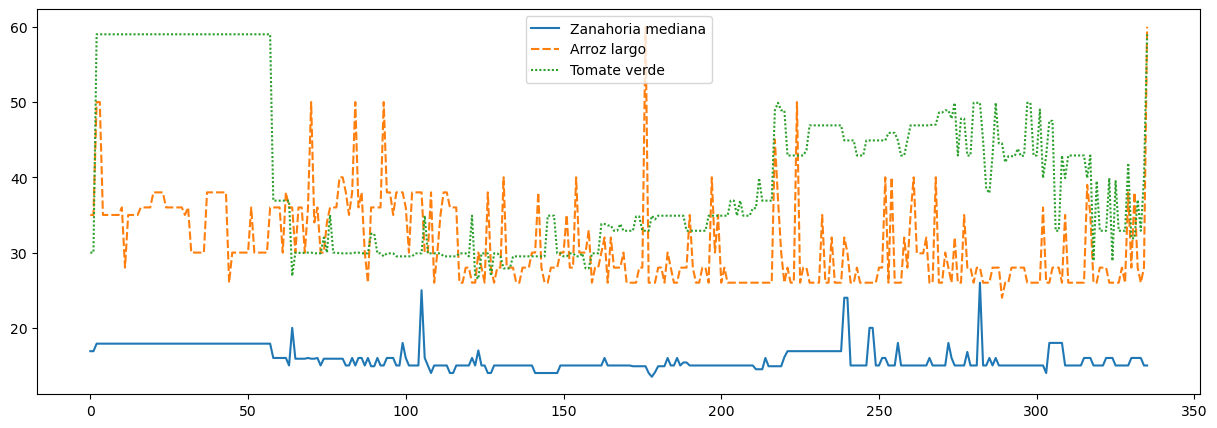

In [53]:
fig = plt.figure(figsize=(15, 5))
sns.lineplot(data=dg[['Zanahoria mediana','Arroz largo', 'Tomate verde']]) #Grafica de algunos precios

# Generación del modelo de predicción

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

import pickle

In [55]:
#Modelo para el precio de 'Arroz largo'
dg.drop(['Unnamed: 0'], axis=1, inplace=True)

In [56]:
dg.set_index('timestamp')

,Zanahoria mediana,Arroz largo,Tomate verde,Pepino,Papa alpha,Jitomate Saladette,Chayote sin espina,Cebolla bola,Chile serrano,Chile poblano,...,Huevo Blanco,Frijol Negro,Frijol Flor de Mayo,Harina de Trigo,Azúcar Estándar,Naranja mediana,Piña,Limón con semilla,Lechuga romana,Aceite Mixto
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-01,16.9,35.0,30.0,21.9,29.9,35.0,44.9,20.0,60.0,40.0,...,37.0,245.85,60.0,20.0,30.0,34.9,50.0,50.0,20.0,42.0
2022-01-02,16.9,35.0,30.0,21.9,29.9,35.0,44.9,20.0,60.0,40.0,...,37.0,245.85,60.0,20.0,30.0,34.9,50.0,50.0,20.0,42.0
2022-01-03,17.9,50.0,59.0,24.9,28.0,52.0,25.0,45.0,80.0,54.0,...,42.0,48.00,50.0,18.0,40.0,25.9,35.0,42.9,26.9,40.0
2022-01-04,17.9,50.0,59.0,24.9,28.0,52.0,25.0,45.0,80.0,54.0,...,42.0,48.00,50.0,18.0,40.0,25.9,35.0,42.9,26.9,40.0
2022-01-05,17.9,35.0,59.0,24.9,26.9,52.0,25.0,45.0,80.0,54.0,...,42.0,55.00,60.0,20.0,40.0,25.9,50.0,50.0,26.9,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-28,16.0,38.0,31.9,29.9,37.0,32.9,22.8,29.9,94.0,64.0,...,48.0,35.00,40.0,25.0,46.0,29.8,45.0,38.8,27.0,62.0
2022-11-29,16.0,28.0,37.0,29.9,39.9,33.9,23.3,33.8,94.0,64.0,...,54.5,48.00,48.0,25.0,46.0,29.8,40.0,42.8,27.0,62.0
2022-11-30,16.0,26.0,32.9,29.9,39.9,33.9,23.3,33.8,94.0,64.0,...,54.5,40.00,40.0,25.0,46.0,21.9,40.0,49.9,24.9,62.0


In [57]:
#Splitting for train & test
steps=60
data_train = dg[:-steps]
data_test  = dg[-steps:]

In [58]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 10
             )

forecaster.fit(y=data_train['Arroz largo'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10] 
Transformer for y: None 
Transformer for exog: None 
Window size: 10 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 275] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2023-04-23 04:35:23 
Last fit date: 2023-04-23 04:35:23 
Skforecast version: 0.7.0 
Python version: 3.9.15 
Forecaster id: None 

In [71]:
# Predictions
# ==============================================================================
steps = 300
predictions = forecaster.predict(steps=steps)

30.548000000000002

## Validation

In [22]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['Arroz largo'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 32.759626366666666


## Exporting model

In [23]:
with open('forecaster.pkl', 'wb') as f:
    pickle.dump(forecaster, f) 

In [24]:
f.close()